## Graph coloring problem solver by brute force, backtraking, backjumping and dynamic backtacking.

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def draw(matrix, color_map):
    colors = ['blue', 'red', 'green', 'yellow', 'magenta', 'black', 'cyan', '#eeefff']
    d = []
    for color in color_map:
        d.append(colors[color])
        
    G = nx.from_numpy_matrix(matrix)
    pos = nx.spring_layout(G)

    plt.figure(3,figsize=(12,12)) 
    nx.draw_planar(G, node_color=d)
    
def get_most_recently_bound(order, variables):
    for i in range(len(order)):
        if order[i] in variables:
            return order[i]

def generate_adj_matrix(n):
    arr = np.random.randint(2, size=(n, n))
    symm = arr * arr.T
    np.fill_diagonal(symm, 0)
    return symm

In [6]:
class Graph:
    def __init__(self, vertices, colors_count, neighbors):
        self.vertices = vertices
        self.colors = [-1] * vertices
        self.colors_count = colors_count
        self.neighbors = neighbors
        self.counts = [-1] * vertices

    def checks_out(self, v=0, c=0):
        conflicts = set()
        for v in range(self.colors_count):
            c = self.colors[v]
            if c == -1:
                continue
            for i in range(self.colors_count):
                if self.neighbors[v][i] == 1 and c == self.colors[i]:
                    conflicts.add(i)
        return len(conflicts) == 0, conflicts
                    
    def checks_out1(self, v, c):
        conflicts = set()
        for i in range(self.vertices):
            if self.neighbors[v][i] == 1 and self.colors[i] == c:
                conflicts.add(i)

        return len(conflicts) == 0, conflicts

    def solve_bf(self, vert=0):
        if vert == self.vertices:
            res, _ = self.checks_out()
            return res
        
        for color in range(self.colors_count):
            res, _ = self.checks_out1(vert, color)
            if res:
                self.colors[vert] = color
                if self.solve_bf(vert+1):
                    return True
                self.colors[vert] = -1

        return False
                
    def solve_bt(self, vert=0):
        if vert == self.vertices:
            return True
        for color in range(self.colors_count):
            res, _ = self.checks_out1(vert, color)
            if res:
                self.colors[vert] = color
                if self.solve_bt(vert+1):
                    return True
                self.colors[vert] = -1

        return False

    def solve(self):
        return self.solve_bt()

    def get_unasigned(self):
        i = 0
        for c in self.colors:
            if c == -1:
                return i
            i+=1
        return None

    def solve_bj(self):
        conflicts = set()
        vert = self.get_unasigned()
        if vert is None:
            return True, set()
        # Iterate over possible values
        answer = False
        for color in range(self.colors_count):
            self.colors[vert] = color
            res, conflicts = self.checks_out(vert, color)
            if res:
                answer, new_conflicts = self.solve_bj()
            else:
                new_conflicts = conflicts
                self.colors[vert] = -1
            if answer:
                return answer, set()
            elif vert not in new_conflicts:
                return False, new_conflicts
            else:
                new_conflicts.remove(vert)
                conflicts = conflicts.union(new_conflicts)

        return False, conflicts

    def solve_d_backtracking(self):
        culprits = {}
        assigned_order = []

        for v in range(self.vertices):
            for c in range(self.colors_count):
                culprits[(v, c)] = None

        assigned = self.get_unasigned()

        while self.get_unasigned() is not None:
            v = self.get_unasigned()
            if v is None:
                break
            for c in range(self.colors_count):
                if culprits[(v, c)] is None:
                    self.colors[v] = c
                    sat, confs = self.checks_out(v, c)

                    if not sat:
                        if v in confs:
                            confs.remove(v)
                        culprits[(v, c)] = confs

                    self.colors[v] = -1

            color_to_set = None
            # print(self.colors)
            for c in range(self.colors_count):
                if culprits[(v, c)] is None:
                    color_to_set = c
                    break

            if color_to_set is not None:
                self.colors[v] = color_to_set
                assigned_order.insert(0, v)

            else:
                conflict_set = set()
                for c in range(self.colors_count):
                    conflict_set = conflict_set.union(culprits[(v, c)])

                if len(conflict_set) == 0:
                    return False
                else:
                    w = get_most_recently_bound(assigned_order, conflict_set)
                    for v in range(self.vertices):
                        for c in range(self.colors_count):
                            if culprits[(v, c)] is not None and w in culprits[(v, c)]:
                                culprits[(v, c)] = None

                    
                    conflict_set.remove(w)
                    culprits[(w, self.colors[w])] = conflict_set
                    self.colors[w] = -1

        return True

True


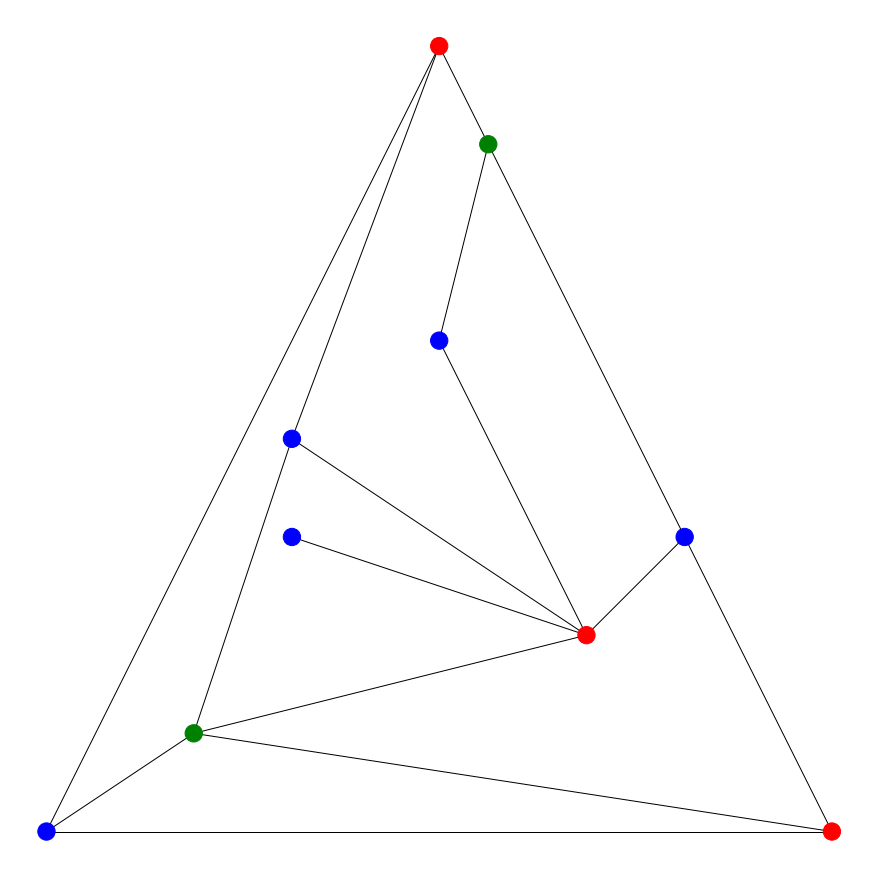

In [7]:
n = 10
neigh = generate_adj_matrix(n)
g = Graph(n, n, neigh.tolist())
print(g.solve_bf())
draw(neigh, g.colors)

True


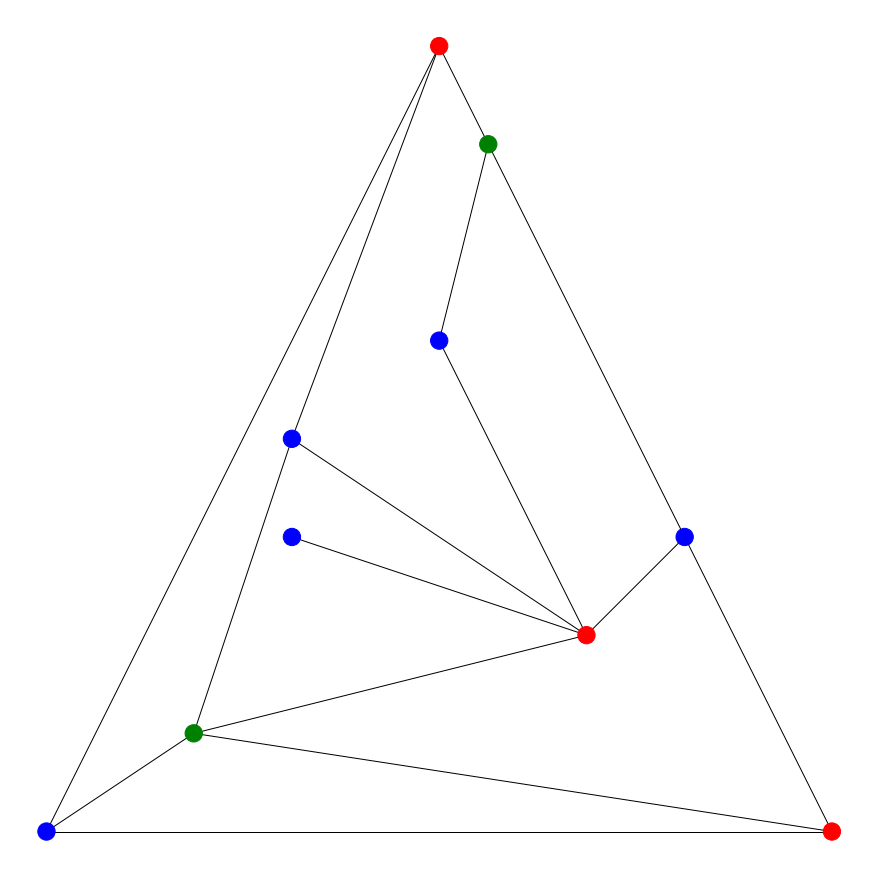

In [8]:
print(g.solve_bt())
draw(neigh, g.colors)

(True, set())


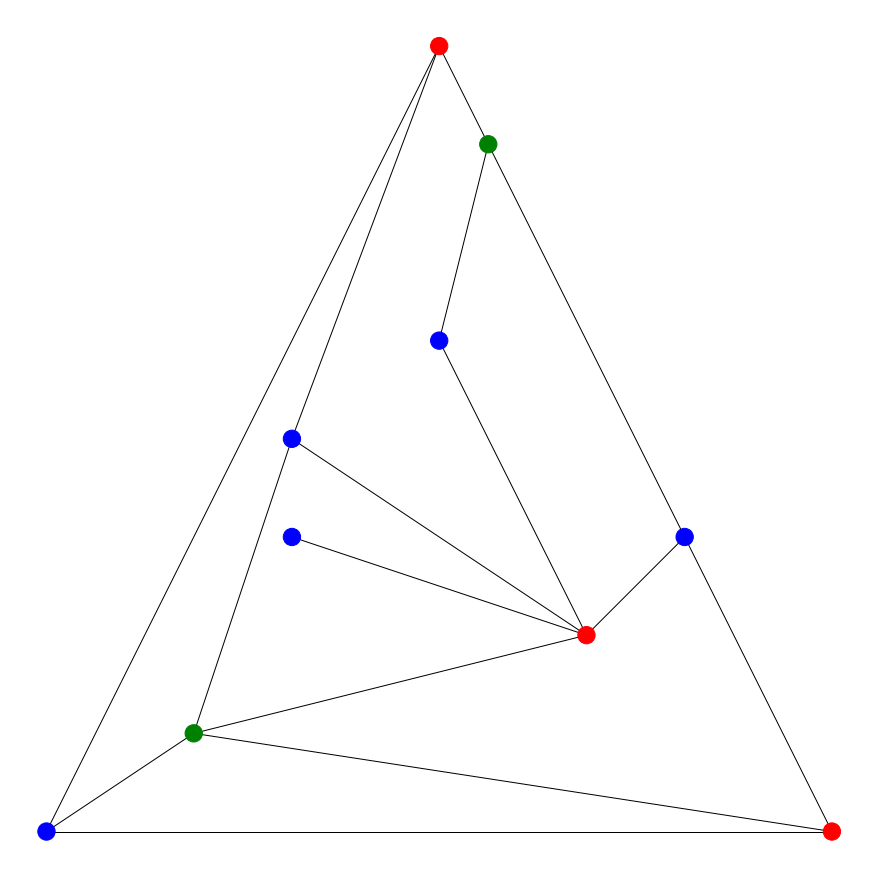

In [9]:
print(g.solve_bj())
draw(neigh, g.colors)

True


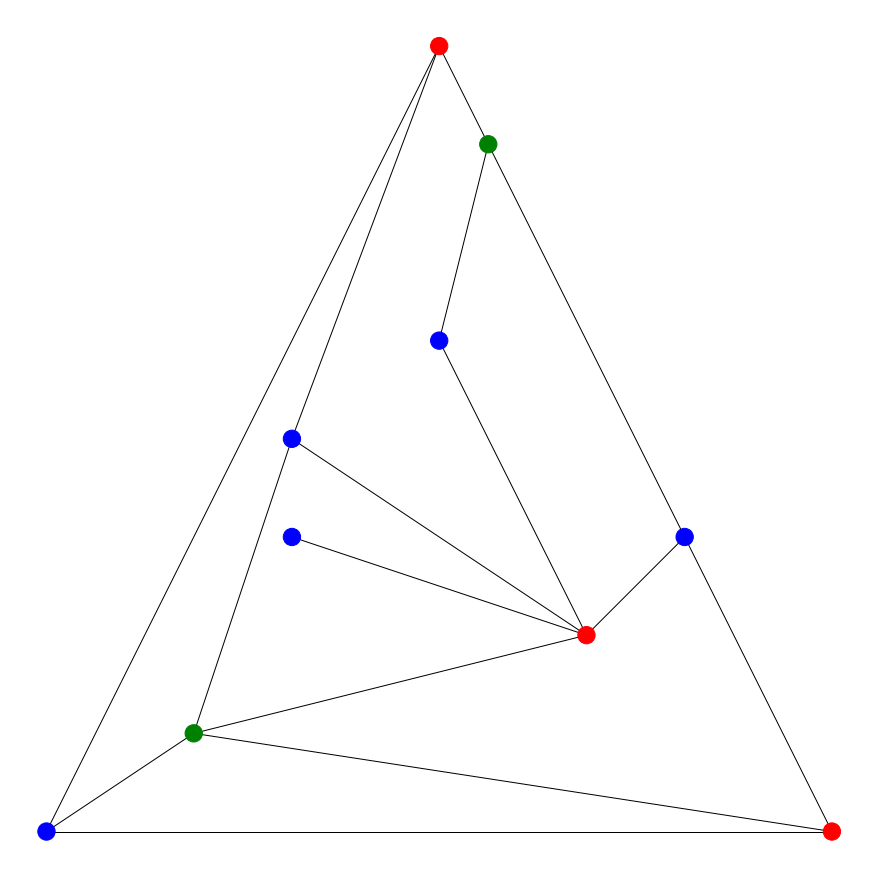

In [10]:
print(g.solve_d_backtracking())
draw(neigh, g.colors)

## Speed measuring

In [11]:
import time

t = time.process_time()
#do some stuff
elapsed_time = time.process_time() - t

In [12]:
def measure_time(func):
    t = time.process_time()
    for _ in range(10000):
        n = 10
        neigh = generate_adj_matrix(n)
        g = Graph(n, n, neigh.tolist())
        func()
    elapsed_time = time.process_time() - t
    print(elapsed_time)

In [13]:
measure_time(g.solve_bf)
measure_time(g.solve_bt)
measure_time(g.solve_bj)
measure_time(g.solve_d_backtracking)

0.609375
0.46875
0.15625
0.265625


Pro zajímavost můžeme pozorovat, že backjumoing je v případě náhodných grafů nejrychlejší metoda.